___
# PROJETO 1

## <font color='red'>Pedro de la Peña</font>
___

## A disputa entre aposentados e universitários no mercado de trabalho

## Introdução

Foram escolhidos os grupos de <strong>universitários e de aposentados</strong> para analizar e comparar suas condições de vida e de trabalho.

Para realizar meu projeto, utilizei como base a seguinte pesquisa:
http://www.aposentadorianoticias.com.br/volta-a-ativa-acirra-disputa-entre-aposentados-e-jovens-sem-experiencia/

Segundo a pesquisa, por causa da inflação e desemprego de jovens, os mais velhos da família são forçados a entrar no mercado de trabalho, sendo estes muitas vezes, aposentados. Além disso, é dito que era necessário muito esforço para encontrar pessoas com mais de 65 anos dispostas para trabalhar, e que em muitos casos, os mais jovens eram escolhidos sobre os idosos em empresas. 

Utilizando as PNADs de 2011 e 2014, sendo o ano dessas pesquisas, respectivamente, momento estável na economia do país e início do período de crise, visei complementar certos dados expostos nas reportagem indicada.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\Projeto 1


# PNAD 2014

In [3]:
#Pnad 2014
p14 = pd.read_csv('PES2014csv.zip', sep=',')

In [4]:
p14.shape

(362627, 342)

In [5]:
n = p14.shape[0]

# Qualitativas: 0302, 6002, 9001

In [6]:
#Sexo
p14['V0302'] = p14['V0302'].astype('category')
p14.V0302.cat.categories = ('Mascuino', 'Feminino')

#Rede de Ensino
p14['V6002'] = p14['V6002'].astype('category')
p14.V6002.cat.categories = ('Pública', 'Privada')

#Trabalhou na semana de referência
p14['V9001'] = p14['V9001'].astype('category')
p14.V9001.cat.categories = ('Sim', 'Não')

# Quantitativas: 9122, 1252, 6003, 4720, 9058, 8005, 4742

In [7]:
#Separação por regiões

df1 = pd.DataFrame()
df1['Regiao']= p14.UF

df1.Regiao[(p14.UF>=10) & (p14.UF<20)]=1
df1.Regiao[(p14.UF>=20) & (p14.UF<30)]=2
df1.Regiao[(p14.UF>=30) & (p14.UF<40)]=3
df1.Regiao[(p14.UF>=40) & (p14.UF<50)]=4
df1.Regiao[(p14.UF>=50) & (p14.UF<60)]=5

df1['Regiao'] = df1['Regiao'].astype('category')
df1.Regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro_Oeste')

In [8]:
#Aposentados
df2 = pd.DataFrame()
df2['Aposentados'] = p14.V9122 

df2.Aposentados = df2.Aposentados[df2.Aposentados == 2]

In [9]:
#Universitários
df3 = pd.DataFrame()
df3['Universidade'] = p14.V6003

df3.Universidade = df3.Universidade[df3.Universidade == 5]

In [10]:
#Renda aposentadoria
df4 = pd.DataFrame()
df4['Renda_Aposentados'] = p14.V1252

df4.Renda_Aposentados[(p14.V1252>=501) & (p14.V1252<1001)] = 1
df4.Renda_Aposentados[(p14.V1252>=1001) & (p14.V1252<1501)]  = 2
df4.Renda_Aposentados[(p14.V1252>=1501) & (p14.V1252<2001)] = 3
df4.Renda_Aposentados[(p14.V1252>2001) & (p14.V1252<3001)] = 4
df4.Renda_Aposentados[(p14.V1252>=3001) & (p14.V1252<4001)] = 5
df4.Renda_Aposentados[(p14.V1252>=4001)] = 6

df4['Renda_Aposentados'] = df4['Renda_Aposentados'].astype('category')
df4.Renda_Aposentados.cat.categories = ('501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [11]:
#Renda domiciliar per capta - Universitários
df5 = pd.DataFrame()
df5['Renda_Uni'] = p14.V4742

df5.Renda_Uni[(p14.V4742>=0) & (p14.V4742<501)] = 1
df5.Renda_Uni[(p14.V4742>=501) & (p14.V4742<1001)] = 2
df5.Renda_Uni[(p14.V4742>=1001) & (p14.V4742<1501)]  = 3
df5.Renda_Uni[(p14.V4742>=1501) & (p14.V4742<2001)] = 4
df5.Renda_Uni[(p14.V4742>2001) & (p14.V4742<3001)] = 5
df5.Renda_Uni[(p14.V4742>=3001) & (p14.V4742<4001)] = 6
df5.Renda_Uni[(p14.V4742>=4001)] = 7

df5['Renda_Uni'] = df5['Renda_Uni'].astype('category')
df5.Renda_Uni.cat.categories = ('Até 500', '501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [12]:
#Renda total - Aposentados
df6 = pd.DataFrame()
df6['Renda_TotApo'] = p14.V4720

df6.Renda_TotApo[(p14.V4720>=0)] = 1
df6.Renda_TotApo[(p14.V4720>=501) & (p14.V4720<1001)] = 2
df6.Renda_TotApo[(p14.V4720>=1001) & (p14.V4720<1501)]  = 3
df6.Renda_TotApo[(p14.V4720>=1501) & (p14.V4720<2001)] = 4
df6.Renda_TotApo[(p14.V4720>2001) & (p14.V4720<3001)] = 5
df6.Renda_TotApo[(p14.V4720>=3001) & (p14.V4720<4001)] = 6
df6.Renda_TotApo[(p14.V4720>=4001)] = 7

df6['Renda_TotApo'] = df6['Renda_TotApo'].astype('category')
df6.Renda_TotApo.cat.categories = ('Até 500', '501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [13]:
#Renda total - Univsersitários
df7 = pd.DataFrame()
df7['Renda_TotUni'] = p14.V4720

df7.Renda_TotUni[(p14.V4720>=0)] = 1
df7.Renda_TotUni[(p14.V4720>=501) & (p14.V4720<1001)] = 2
df7.Renda_TotUni[(p14.V4720>=1001) & (p14.V4720<1501)]  = 3
df7.Renda_TotUni[(p14.V4720>=1501) & (p14.V4720<2001)] = 4
df7.Renda_TotUni[(p14.V4720>2001) & (p14.V4720<3001)] = 5
df7.Renda_TotUni[(p14.V4720>=3001) & (p14.V4720<4001)] = 6
df7.Renda_TotUni[(p14.V4720>=4001)] = 7

df7['Renda_TotUni'] = df7['Renda_TotUni'].astype('category')
df7.Renda_TotUni.cat.categories = ('Até 500', '501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [14]:
#Horas trabalhadas/semana
df8 = pd.DataFrame()
df8['Horas_Trab'] = p14.V9058

df8.Horas_Trab[(p14.V9058>=0) & (p14.V9058<11)] = 1
df8.Horas_Trab[(p14.V9058>=11) & (p14.V9058<21)] = 2
df8.Horas_Trab[(p14.V9058>=21) & (p14.V9058<31)] = 3
df8.Horas_Trab[(p14.V9058>=31) & (p14.V9058<41)] = 4
df8.Horas_Trab[(p14.V9058>=40)] = 5

df8['Horas_Trab'] = df8['Horas_Trab'].astype('category')
df8.Horas_Trab.cat.categories = ('Até 10 horas', '11 a 20', '21 a 30', '31 a 40', 'Mais de 40')

# PNAD 2011

In [15]:
p11 = pd.read_csv('PES2011.zip', sep=',')

In [16]:
p11.shape

(358919, 324)

In [17]:
m = p11.shape[0]

# Qualitativas: 0302, 6002, 9001

In [18]:
#Sexo
p11['V0302'] = p11['V0302'].astype('category')
p11.V0302.cat.categories = ('Mascuino', 'Feminino')

#Rede de Ensino
p11['V6002'] = p11['V6002'].astype('category')
p11.V6002.cat.categories = ('Pública', 'Privada')

#Trabalhou na semana de referência
p11['V9001'] = p11['V9001'].astype('category')
p11.V9001.cat.categories = ('Sim', 'Não')

# Quantitativas: 9122, 1252, 6003, 4720, 9058, 8005, 4742

In [19]:
#Aposentados
df2a = pd.DataFrame()
df2a['Aposentados'] = p11.V9122 

df2a.Aposentados = df2a.Aposentados[df2a.Aposentados == 2]

In [20]:
#Universitários
df3a = pd.DataFrame()
df3a['Universidade'] = p11.V6003

df3a.Universidade = df3a.Universidade[df3a.Universidade == 5]

In [21]:
#Renda aposentadoria
df4a = pd.DataFrame()
df4a['Renda_Aposentados'] = p11.V1252

df4a.Renda_Aposentados[(p11.V1252>=501) & (p11.V1252<1001)] = 1
df4a.Renda_Aposentados[(p11.V1252>=1001) & (p11.V1252<1501)]  = 2
df4a.Renda_Aposentados[(p11.V1252>=1501) & (p11.V1252<2001)] = 3
df4a.Renda_Aposentados[(p11.V1252>2001) & (p11.V1252<3001)] = 4
df4a.Renda_Aposentados[(p11.V1252>=3001) & (p11.V1252<4001)] = 5
df4a.Renda_Aposentados[(p11.V1252>=4001)] = 6

df4a['Renda_Aposentados'] = df4a['Renda_Aposentados'].astype('category')
df4a.Renda_Aposentados.cat.categories = ('501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [22]:
#Renda domiciliar per capta - Universitários
df5a = pd.DataFrame()
df5a['Renda_Uni'] = p11.V4742

df5a.Renda_Uni[(p11.V4742>=0) & (p11.V4742<501)] = 1
df5a.Renda_Uni[(p11.V4742>=501) & (p11.V4742<1001)] = 2
df5a.Renda_Uni[(p11.V4742>=1001) & (p11.V4742<1501)]  = 3
df5a.Renda_Uni[(p11.V4742>=1501) & (p11.V4742<2001)] = 4
df5a.Renda_Uni[(p11.V4742>2001) & (p11.V4742<3001)] = 5
df5a.Renda_Uni[(p11.V4742>=3001) & (p11.V4742<4001)] = 6
df5a.Renda_Uni[(p11.V4742>=4001)] = 7

df5a['Renda_Uni'] = df5a['Renda_Uni'].astype('category')
df5a.Renda_Uni.cat.categories = ('Até 500', '501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [23]:
#Renda total - Aposentados
df6a = pd.DataFrame()
df6a['Renda_TotApo'] = p11.V4720

df6a.Renda_TotApo[(p11.V4720>=0)] = 1
df6a.Renda_TotApo[(p11.V4720>=501) & (p11.V4720<1001)] = 2
df6a.Renda_TotApo[(p11.V4720>=1001) & (p11.V4720<1501)]  = 3
df6a.Renda_TotApo[(p11.V4720>=1501) & (p11.V4720<2001)] = 4
df6a.Renda_TotApo[(p11.V4720>2001) & (p11.V4720<3001)] = 5
df6a.Renda_TotApo[(p11.V4720>=3001) & (p11.V4720<4001)] = 6
df6a.Renda_TotApo[(p11.V4720>=4001)] = 7

df6a['Renda_TotApo'] = df6a['Renda_TotApo'].astype('category')
df6a.Renda_TotApo.cat.categories = ('Até 500', '501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [24]:
#Renda total - Univsersitários
df7a = pd.DataFrame()
df7a['Renda_TotUni'] = p11.V4720

df7a.Renda_TotUni[(p11.V4720>=0)] = 1
df7a.Renda_TotUni[(p11.V4720>=501) & (p11.V4720<1001)] = 2
df7a.Renda_TotUni[(p11.V4720>=1001) & (p11.V4720<1501)]  = 3
df7a.Renda_TotUni[(p11.V4720>=1501) & (p11.V4720<2001)] = 4
df7a.Renda_TotUni[(p11.V4720>2001) & (p11.V4720<3001)] = 5
df7a.Renda_TotUni[(p11.V4720>=3001) & (p11.V4720<4001)] = 6
df7a.Renda_TotUni[(p11.V4720>=4001)] = 7

df7a['Renda_TotUni'] = df7a['Renda_TotUni'].astype('category')
df7a.Renda_TotUni.cat.categories = ('Até 500', '501~1000', '1001~1500', '1501~2000', '2001~3000', '3001~4000', 'Mais de 4000')

In [25]:
#Horas trabalhadas/semana
df8a = pd.DataFrame()
df8a['Horas_Trab'] = p11.V9058

df8a.Horas_Trab[(p11.V9058>=0) & (p11.V9058<11)] = 1
df8a.Horas_Trab[(p11.V9058>=11) & (p11.V9058<21)] = 2
df8a.Horas_Trab[(p11.V9058>=21) & (p11.V9058<31)] = 3
df8a.Horas_Trab[(p11.V9058>=31) & (p11.V9058<41)] = 4
df8a.Horas_Trab[(p11.V9058>=40)] = 5

df8a['Horas_Trab'] = df8a['Horas_Trab'].astype('category')
df8a.Horas_Trab.cat.categories = ('Até 10 horas', '11 a 20', '21 a 30', '31 a 40', 'Mais de 40')

#  

#  

# Gráficos, tabelas, resultados e comparações das PNADs

## Obs: As análises dos dados obtidos encontram-se logo após os referidos

In [26]:
#Total de pessoas estudadas 2014
print("Total de Aposentados - 2014")
print(df2.Aposentados.value_counts())
print(''''     
     ''')
print("Total de Universitários - 2014")
print(df3.Universidade.value_counts())
print(''''
       
     ''')

#Total de pessoas estudadas 2011
print("Total de Aposentados - 2011")
print(df2a.Aposentados.value_counts())
print(''''
     ''')
print("Total de Universitários - 2011")
print(df3a.Universidade.value_counts())

Total de Aposentados - 2014
2.0    38643
Name: Aposentados, dtype: int64
'     
     
Total de Universitários - 2014
5.0    13505
Name: Universidade, dtype: int64
'
       
     
Total de Aposentados - 2011
2.0    34849
Name: Aposentados, dtype: int64
'
     
Total de Universitários - 2011
5.0    12187
Name: Universidade, dtype: int64


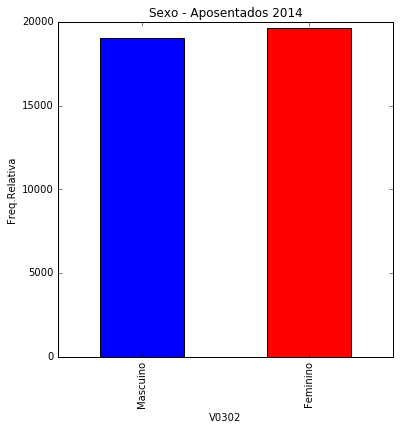

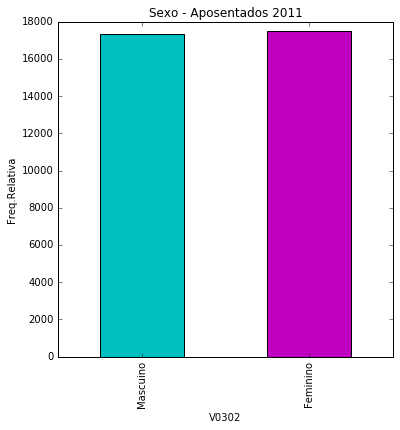

In [27]:
#2014
SA = pd.crosstab(p14.V0302, df2.Aposentados)
plot = SA.plot(kind='bar', title = 'Sexo - Aposentados 2014', figsize=(6, 6),color=('b','r'), legend=False)
plt.ylabel('Freq.Relativa')

#2011
SAa = pd.crosstab(p11.V0302, df2a.Aposentados)
plot = SAa.plot(kind='bar', title = 'Sexo - Aposentados 2011', figsize=(6, 6),color=('c','m'), legend=False)
plt.ylabel('Freq.Relativa')



Os gêneros entre os aposentados estão praticamente na mesma proporção para os dois anos estudados.

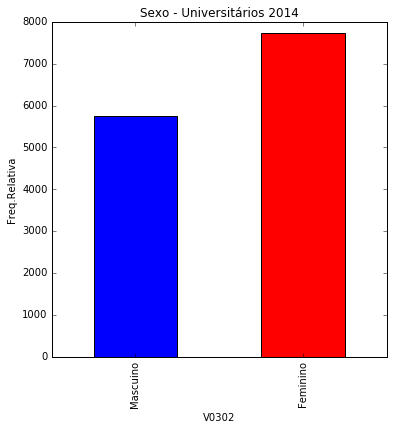

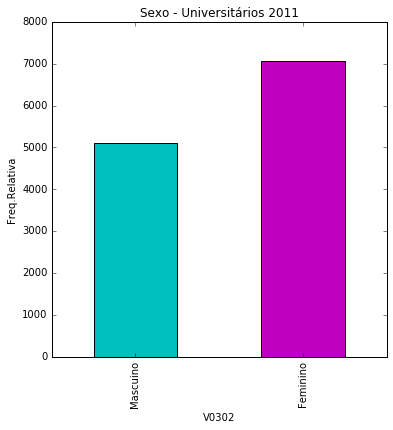

In [28]:
#2014
SU = pd.crosstab(p14.V0302, df3.Universidade)
plot = SU.plot(kind='bar', title = 'Sexo - Universitários 2014', figsize=(6, 6),color=('b','r'), legend=False)
plt.ylabel('Freq.Relativa')

#2011
SUa = pd.crosstab(p11.V0302, df3a.Universidade)
plot = SUa.plot(kind='bar', title = 'Sexo - Universitários 2011', figsize=(6, 6),color=('c','m'), legend=False)
plt.ylabel('Freq.Relativa')


Há certa diferença nos gêneros que cursam universidades. O maior número de mulheres nas universidades pode ser comprovado ao checar algumas pesquisas feitas pelo governo, como a disponibilizada a seguir:
    http://www.brasil.gov.br/educacao/2015/03/mulheres-sao-maioria-no-ingresso-e-na-conclusao-de-cursos-superiores

In [29]:
#Aposentados por região 2014
Final1 = pd.crosstab(df1.Regiao, df2.Aposentados)
print("Aposentados em 2014")
Final1


Aposentados em 2014


Aposentados,2.0
Regiao,
Norte,3990
Nordeste,10918
Sudeste,12537
Sul,7941
Centro_Oeste,3257


In [30]:
#Aposentados por região 2011
Final1a = pd.crosstab(df1.Regiao, df2a.Aposentados)
print("Aposentados em 2011")
Final1a

Aposentados em 2011


Aposentados,2.0
Regiao,
Norte,3507
Nordeste,10261
Sudeste,11519
Sul,6971
Centro_Oeste,2591


Os números de aposentados por região refletem diretamente a proporção da população residente das mesmas. Contudo, o número de aposentados de 2014 é maior do que o de 2011, o que pode ser justificado pelo envelhecimento da população e o consequente fim do <strong>bônus demográfico</strong>.

In [31]:
#Universitários por região 2014
Final2 = pd.crosstab(df1.Regiao, df3.Universidade)
print("Universitários em 2014")
Final2

Universitários em 2014


Universidade,5.0
Regiao,
Norte,2074
Nordeste,3420
Sudeste,3940
Sul,2289
Centro_Oeste,1782


In [32]:
#Universitários por região 2011
Final2a = pd.crosstab(df1.Regiao, df3a.Universidade)
print("Universitários em 2011")
Final2a

Universitários em 2011


Universidade,5.0
Regiao,
Norte,1940
Nordeste,2910
Sudeste,3535
Sul,2217
Centro_Oeste,1585


O número de universitários pode ser alterado de acordo com o tamanho da população na região e com as condições financeiras da mesma. Além disso, é possivel perceber que nas regiões sudeste e nordeste, o aumento de universitários foi significativo em relação as demais regiões, quando comparamos a PNAD de 2011 com a de 2014. A análise das condições financeiras será feita em gráficos seguintes.

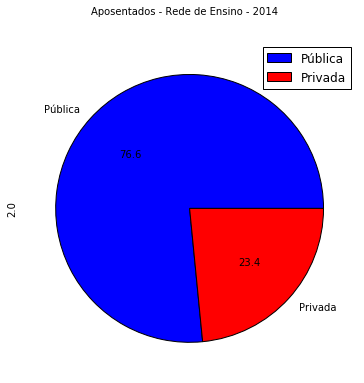

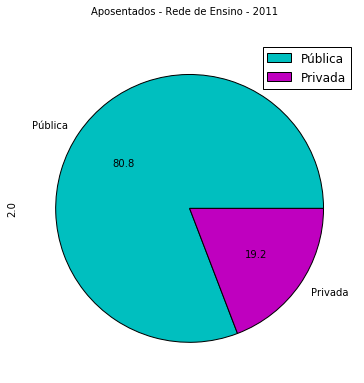

In [33]:
#2014
F1 = pd.crosstab(p14.V6002, df2.Aposentados)
plot = F1.plot(kind='pie', title = 'Aposentados - Rede de Ensino - 2014',autopct='%.1f', figsize=(6, 6), subplots = True, 
               colors=('b','r'))

#2011
F1a = pd.crosstab(p11.V6002, df2a.Aposentados)
plot = F1a.plot(kind='pie', title = 'Aposentados - Rede de Ensino - 2011',autopct='%.1f', figsize=(6, 6), subplots = True, 
                colors=('c','m'))

A maioria dos aposentados vieram de escolas públicas, tendo em vista que, no passado, a concorrência para entrar em uma universidade era menos acirrada devido ao menor número de pessoas na sociedade. Além disso, não é garantido que todos os aposentados de fato frequentaram uma universidade e que precisaram apoio particular para ingressar nela, como será observado no próximo gráfico.

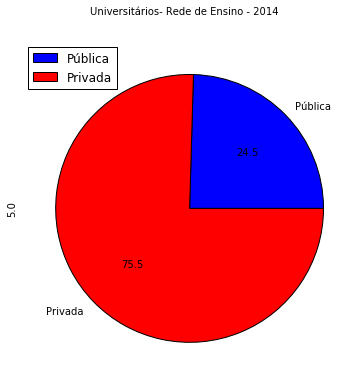

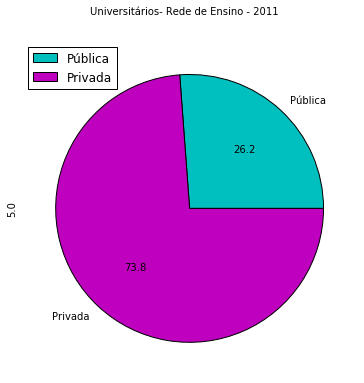

In [34]:
#2014
F2 = pd.crosstab(p14.V6002, df3.Universidade)
plot = F2.plot(kind='pie', title = 'Universitários- Rede de Ensino - 2014',autopct='%.1f', figsize=(6, 6), subplots = True, colors=('b','r'))
#2011
F2a = pd.crosstab(p11.V6002, df3a.Universidade)
plot = F2a.plot(kind='pie', title = 'Universitários- Rede de Ensino - 2011',autopct='%.1f', figsize=(6, 6), subplots = True, colors=('c','m'))

No caso dos universitários, devido a falta de investimentos no setor de ensino público e a alta concorrência presente nos cursos
superiores da atualidade, a situação é mais favorável para aqueles que frequentaram escolas particulares. Conforme o passar dos anos, a competição torna-se cada vez mais acirrada e como já foi dito, é relativamente mais comum que alunos de escolas particulares entrem em faculdades. Logo, regiões mais ricas
como o sudeste e sul do país tendem a ter <strong>mais universitários em relação ao total das populações por região</strong>.

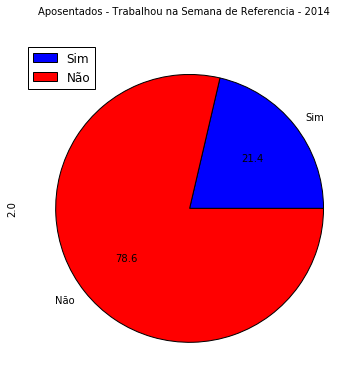

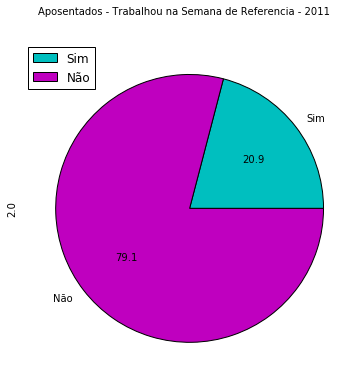

In [35]:
#2014
F3 = pd.crosstab(p14.V9001, df2.Aposentados)
plot = F3.plot(kind='pie', title = 'Aposentados - Trabalhou na Semana de Referencia - 2014',autopct='%.1f', figsize=(6, 6), 
               subplots = True, colors=('b','r'))

#2011
F3a = pd.crosstab(p11.V9001, df2a.Aposentados)
plot = F3a.plot(kind='pie', title = 'Aposentados - Trabalhou na Semana de Referencia - 2011',autopct='%.1f', figsize=(6, 6),
                subplots = True, colors=('c','m'))


O número de pessoas que trabalham após a aposentadoria é superior a 20% dos entrevistados em ambos casos. Devemos levar em conta que a pesquisa realizada em 2016 (citada na descrição do projeto), compara este ano com 2015, que foram períodos de instabilidade política e econômica. O ano de 2014, analisado nesta PNAD, foi a época em que se deu início a este período de recessão. Ao fazer a mesma comparação com 2011, um ano de prosperidade econômica, o número é inferior, porém ainda é relativamente alto.

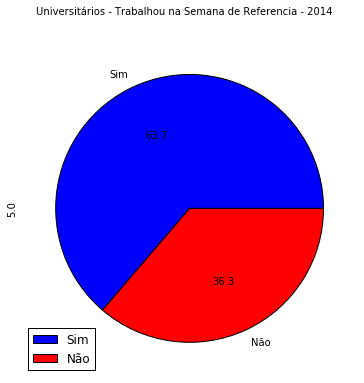

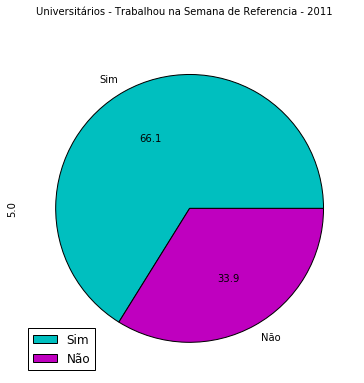

In [36]:
#2014
F4 = pd.crosstab(p14.V9001, df3.Universidade)
plot = F4.plot(kind='pie', title = 'Universitários - Trabalhou na Semana de Referencia - 2014',autopct='%.1f', figsize=(6, 6),
               subplots = True, colors=('b','r'))

#2011
F4a = pd.crosstab(p11.V9001, df3a.Universidade)
plot = F4a.plot(kind='pie', title = 'Universitários - Trabalhou na Semana de Referencia - 2011',autopct='%.1f', figsize=(6, 6),
                subplots = True, colors=('c','m'))

O gráfico de 2011 mostra que aproximadamente 2/3 dos universitários trabalhavam enquanto realizavam seus cursos, enquanto em 2014 o número reduziu 2%. Levando em conta os gráficos dos aposentados e universitários, há como comprovar uma parte da pesquisa citada na descrição: os aposentados estão aumentando seus números no mercado de trabalho, enquanto os jovens inexperientes estão perdendo seu lugar.

# OBSERVAÇÃO: 

Os gráficos abaixo de "Renda Aposentados- Aposentadoria", "Renda Universitários - Domiciliar per capta" e "Renda Universitários/Aposentados - Trabalho/Aposentadoria + Trabalho", são <strong>TRÊS</strong> variáveis distintas na PNAD. Utilizei gráficos de barras para todos os casos pois era a melhor opção para analizá-los.

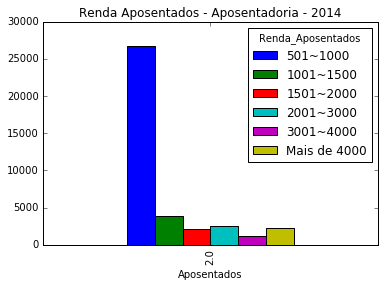

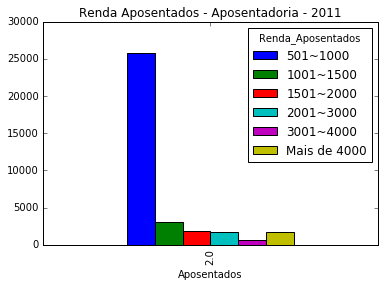

In [37]:
#2014
F5 = pd.crosstab(df2.Aposentados, df4.Renda_Aposentados)
F5.plot(kind="bar",title='Renda Aposentados - Aposentadoria - 2014')

#2011
F5a = pd.crosstab(df2a.Aposentados, df4a.Renda_Aposentados)
F5a.plot(kind="bar",title='Renda Aposentados - Aposentadoria - 2011')

Em 2011 havia menos aposentados na sociedade do que em 2014. Logo, havia menos pessoas recebendo a aposentadoria, fator que pode ser observado comparando os dois gráficos. O gráfico não começa em "0" pois uma aposentadoria garante quantias superiores a 500 reais.

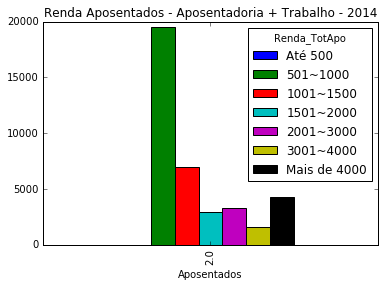

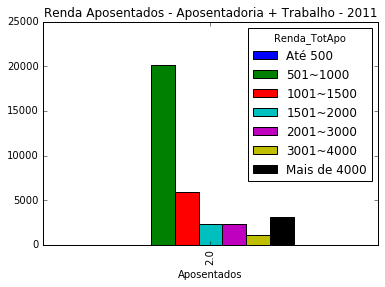

In [38]:
#2014
F5A = pd.crosstab(df2.Aposentados, df6.Renda_TotApo)
F5A.plot(kind="bar", title='Renda Aposentados - Aposentadoria + Trabalho - 2014')

#2011
F5Aa = pd.crosstab(df2a.Aposentados, df6a.Renda_TotApo)
F5Aa.plot(kind="bar", title='Renda Aposentados - Aposentadoria + Trabalho - 2011')

Por outro lado, com apenas 20% dos aposentados trabalhando, o gráfico já adquire uma outra perspectiva. O número de aposentados que recebem até 1000 reais caiu em 1/5 em comparação com os gráficos anteriores, e tornou-se mais comum encontrar aposentados recebendo quantias mais altas. Não há pessoas que recebem até 500 reais pelo motivo descrito na análise descrita acima, e mesmo que os aposentados não recebessem seu benefício, receberiam ao menos a quantia de um salário minimo em seus empregos.

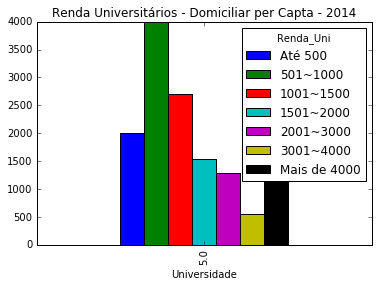

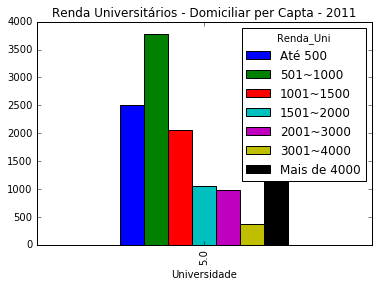

In [39]:
#2014
F6 = pd.crosstab(df3.Universidade, df5.Renda_Uni)
F6.plot(kind="bar" ,title='Renda Universitários - Domiciliar per Capta - 2014')

#2011
F6a = pd.crosstab(df3a.Universidade, df5a.Renda_Uni)
F6a.plot(kind="bar" ,title='Renda Universitários - Domiciliar per Capta - 2011')

O gráfico de renda per capita dos universitários é melhor distribuido do que o de aposentadoria. Neste gráfico considera-se a renda de toda a família dividida pelos seus integrantes e que, se for comparado porporcionalmente ao gráfico de aposentadoria, é possivel observar que muitos universitários, até não trabalhando, podem receber mais que um aposentado, em ambos gráficos.

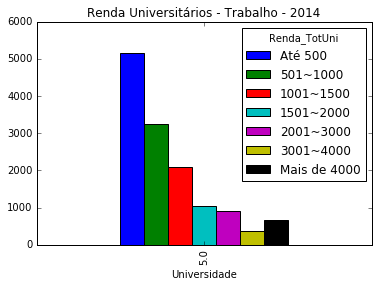

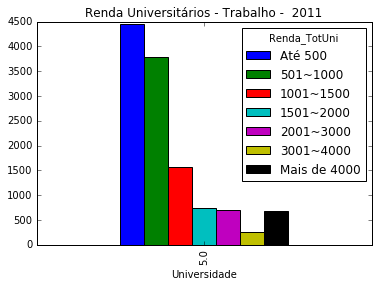

In [40]:
#2014
F6U = pd.crosstab(df3.Universidade, df7.Renda_TotUni)
F6U.plot(kind="bar", title='Renda Universitários - Trabalho - 2014')

#2011
F6Ua = pd.crosstab(df3a.Universidade, df7a.Renda_TotUni)
F6Ua.plot(kind="bar", title='Renda Universitários - Trabalho -  2011')

Neste gráfico, são consideradas todas as formas que um universitário consegue sua renda. Pelo fato de ser relativamente comum os universitários receberem algum apoio financeiro dos pais para sua sobrevivência (água, luz, comida...), pode-se dizer que mesmo ganhando em seus trabalhos menos que um aposentado ganharia pelo seu benefício, os estudantes levam melhores qualidades de vida.

Comparando os gráficos de 2014 e 2011, percebe-se que o número de universitários recebendo de 501 a 1000 diminuiu, enquanto o de 1000 a 1500 e de 1501 a 2000 aumentou. Diferentemente dos gráficos dos aposentados, os universitários muitas vezes apenas trabalham "meio turno" e por isso acabam recebendo menos que um saláro mínimo.

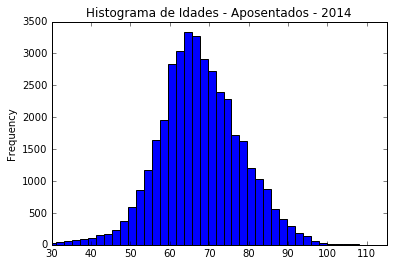

In [41]:
#2014
c = p14[(p14.V9122 == 2)]
c.V8005.plot(kind='hist',bins=50,xlim=[30,115], title= "Histograma de Idades - Aposentados - 2014")

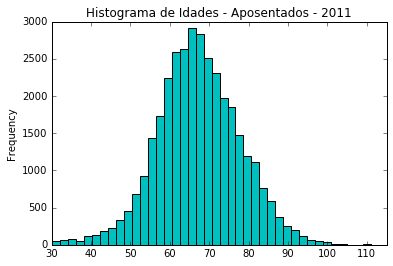

In [42]:
#2011
ca = p11[(p11.V9122 == 2)]
ca.V8005.plot(kind='hist',bins=50,xlim=[30,115], title= "Histograma de Idades - Aposentados - 2011", color=('c'))

A proporção entre as idades dos aposentados permaneceu praticamente igual nos anos de 2011 e 2014, contudo, o número de aposentados em 2014 é maior, o que afetou a escala do gráfico.

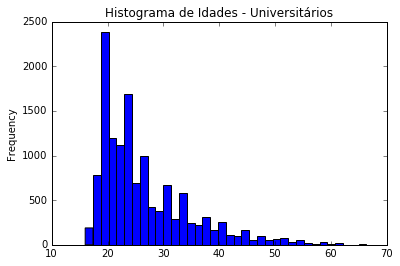

In [43]:
c1 = p14[(p14.V6003 == 5)]
c1.V8005.plot(kind='hist',bins=50,xlim=[10,70],title= "Histograma de Idades - Universitários")

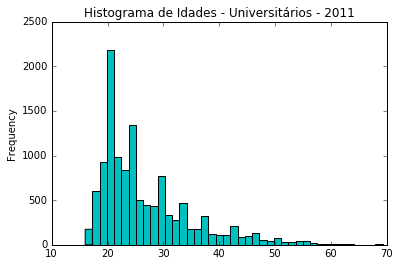

In [44]:
#2011
c1a = p11[(p11.V6003 == 5)]
c1a.V8005.plot(kind='hist',bins=50,xlim=[10,70],title= "Histograma de Idades - Universitários - 2011", color=('c'))

Em ambos gráficos, a maior concentração de universitários é nas idades de 18 a 19 anos e de 24 a 25. Contudo, a quantidade de universitários em 2014 é superioar a de 2011.

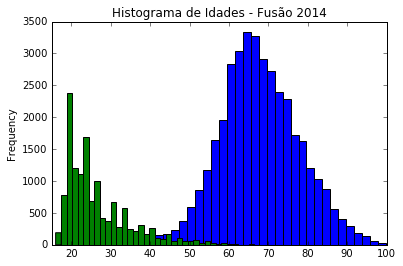

In [71]:
#2014
c.V8005.plot(kind='hist',bins=50,xlim=[15,100], title= "Histograma de Idades - Fusão 2014")
c1.V8005.plot(kind='hist',bins=50,xlim=[15,100],title= "Histograma de Idades - Fusão 2014")

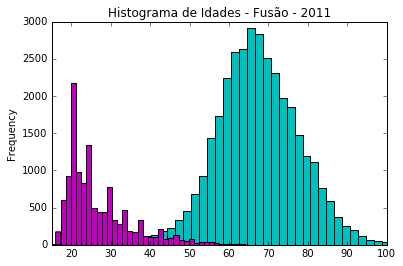

In [70]:
#2011
ca.V8005.plot(kind='hist',bins=50,xlim=[15,100], title= "Histograma de Idades - Fusão - 2011", color=('c'))
c1a.V8005.plot(kind='hist',bins=50,xlim=[15,100],title= "Histograma de Idades - Fusão - 2011", color=('m'))

Ao disponiblizar os histogramas de universitários e aposentados de um mesmo ano, lado a lado, torna-se mais fácil de se compará-los, além de obtermos uma melhor noção da proporção entre estes dois grupos.

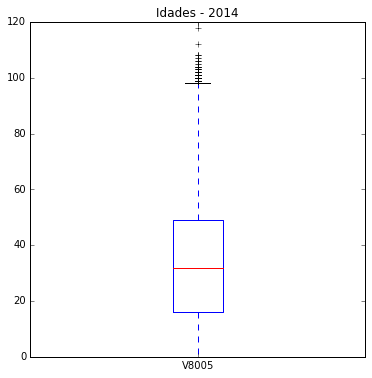

In [45]:
#Boxplot de idades 2014
plot = p14.V8005.plot.box(title='Idades - 2014', figsize=(6,6))

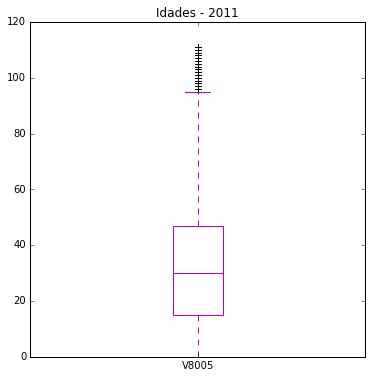

In [46]:
#Boxplot de idades 2011
plot = p11.V8005.plot.box(title='Idades - 2011', figsize=(6,6), color=('m'))

Estes boxplots contém dados de toda a população, e não só de aposentados e universitários como nos "Histogramas de Idade - Fusão (ano)" disponibilizados anteriormente.

Ao comparar os boxplots, é pequena a diferença na concentração da população geral, que permaneceu aproximadamente entre 18 a 50 anos. Levando em conta os histogramas anteriores, observa-se que que os universitários estão dispostos, em sua maioria, nesta massa, enquanto os aposentados são mais comuns após os 60 anos.

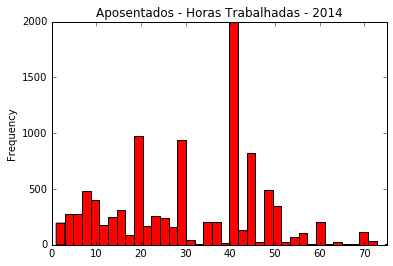

In [47]:
#2014
c.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Aposentados - Horas Trabalhadas - 2014" ,color =('r'))

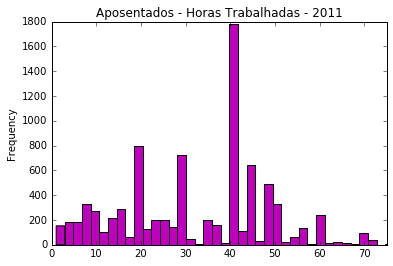

In [48]:
#2011
ca.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Aposentados - Horas Trabalhadas - 2011" ,color =('m'))

Assim como o histograma de idades, a proporção de horas trabalhadas permaneceu praticamente a mesma, contudo, houve aumento na 
quantidade de indivíduos trabalhando, como pode ser visto pela sobreposição dos dois histogramas a seguir.

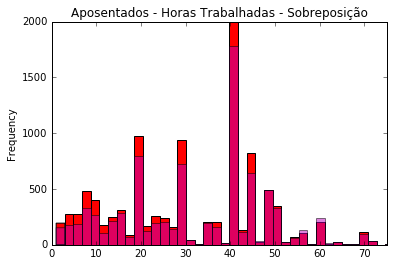

In [49]:
#2014
c.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Aposentados - Horas Trabalhadas - Sobreposição" ,color =('r'))
#2011
ca.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Aposentados - Horas Trabalhadas - Sobreposição" ,color =('m'), alpha=0.5)

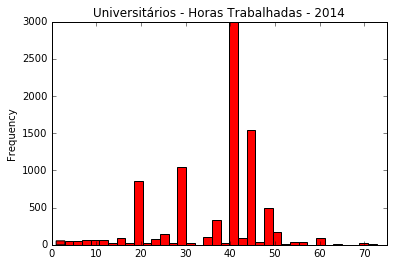

In [50]:
#2014
c1.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Universitários - Horas Trabalhadas - 2014" ,color =('r'))

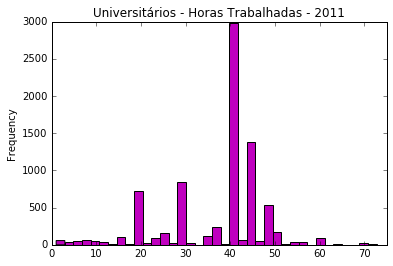

In [51]:
#2011
c1a.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Universitários - Horas Trabalhadas - 2011" ,color =('m'))

Para cargas horárias de até 15 horas/semana, o número de universitários trabalhando reduziu de 2011 para 2014, enquanto a principal carga horaria, de 40 horas, permaneceu igual entre estes dois anos. O histograma abaixo é uma sobreposição dos dois histogramas analisados acima.

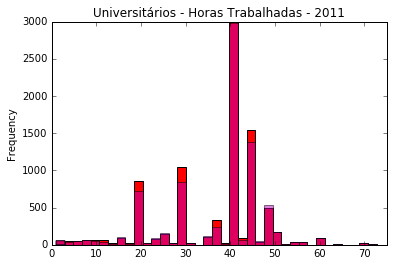

In [52]:
#2014
c1.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Universitários - Horas Trabalhadas - 2014" ,color =('r'))
#2011
c1a.V9058.plot(kind='hist',bins=50,xlim=[0,75],title= "Universitários - Horas Trabalhadas - 2011" ,color =('m'), alpha=0.5)

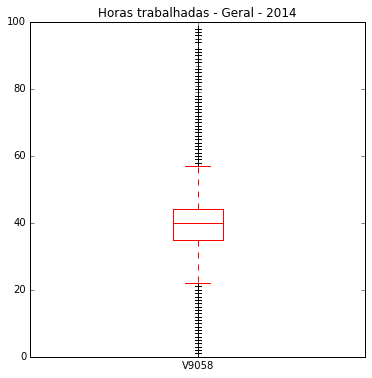

In [53]:
#Boxplot de horas trabalhadas 2014
plot = p14.V9058.plot.box(title='Horas trabalhadas - Geral - 2014', figsize=(6,6), color=('r'))

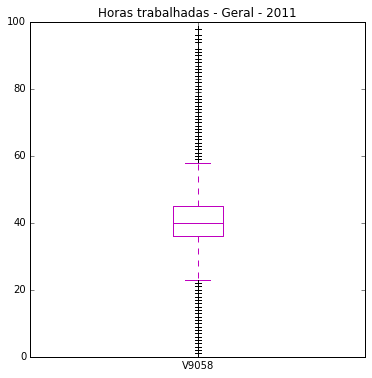

In [72]:
#Boxplot de horas trabalhadas 2014
plot = p11.V9058.plot.box(title='Horas trabalhadas - Geral - 2011', figsize=(6,6), color=('m'))

Os boxplots contém informações de toda a população, e não só de aposentados e universitários.

Comparando os dois boxplots, a maior concentração de pessoas trabalhando na sociedade é na faixa de 36 a 45 horas/semana. No caso dos aposentados, eles estão principalmente concentrados nos períodos de 8 a 40 horas, enquanto os universitários estão concentrados principalmente nos períodos de 30 e 40 horas.

#  

# Conclusão

De acordo com a pesquisa utilizada como base para meu estudo, os aposentados estão tomando cada vez mais o lugar dos jovens inexperientes no mercado de trabalho. As PNADs utilizadas foram dos anos de 2011, ano de prosperidade econômica e 2014, ano do início da crise política e econômica. A pesquisa-base utilizou dados coletados em PNADs de 2015 e 2016.

Ao analisar os gráficos do porcentual de aposentados trabalhando em 2011 e 2014, percebe-se que ocorreu um aumento gradativo ao longo destes anos, culminando em 2016, ano da pesquisa-base. Além disso, a renda obtida pelos aposentados com benefício da aposentadoria somado aos ganhos no trabalho foi maior em 2014 que em 2011. Os ganhos nos trabalhos por parte dos universitários foi, relativamente,  maior nas faixas de 1000 a 2000 reais por mês. Contudo, deve-se considerar que havia menos jovens estudantes tabalhando neste periodo em relação a 2011.

Também foi possível observar que o número de aposentados trabalhando de 2 a 15 horas por semana aumentou em 2014 em relação aos dados de 2011 enquanto para os universitários, a situação foi inversa, complementando os dados de 2015 e 2016 expostos na pesquisa-base.